In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
test.shape

(979059, 23)

In [4]:
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979059 entries, 0 to 979058
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   UNIQUE_IDENTIFIER         979059 non-null  int64  
 1   SEQUENCE_NO               979059 non-null  int64  
 2   STATUS_CHECK              979059 non-null  int64  
 3   CATEGORY_1                979059 non-null  object 
 4   CATEGORY_2                979059 non-null  object 
 5   ACTIVE_YN                 979059 non-null  int64  
 6   ENTRY                     979059 non-null  float64
 7   REVENUE                   979059 non-null  float64
 8   WINNINGS_1                979059 non-null  float64
 9   WINNINGS_2                979059 non-null  float64
 10  DISCOUNT                  979059 non-null  float64
 11  DEPOSIT                   979059 non-null  float64
 12  DEPOSIT_NUMBER            979059 non-null  float64
 13  DEPOSIT_2                 979059 non-null  f

In [5]:
data.head(20)

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,...,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.13735,0.011550,0.09990,0.0,...,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.15835,0.010425,0.02420,0.0,...,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.44490,0.035850,0.23980,0.0,...,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
5,98481267304,6,0,M,B,1,0.00000,0.000000,0.00000,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
6,98481267304,7,0,M,B,1,0.04505,0.002950,0.00660,0.0,...,0.0,0.0,1.1,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
7,98481267698,1,1,M,I,1,5.00000,0.750000,0.00000,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,7.182779,115.068493
8,98481267698,2,1,M,I,1,11.25000,1.690000,24.64500,0.0,...,0.0,0.0,0.7,0.5,0.0,0.0,0.0,0.0,7.182779,115.068493
9,98481267698,3,1,M,I,1,47.14050,6.909500,45.69765,0.0,...,0.0,2.0,1.8,0.8,0.0,0.0,0.0,0.0,7.182779,115.068493


In [6]:
test['CATEGORY_1'].value_counts()

B    399083
K    232404
E    117953
A     69006
C     60921
D     38194
M     35456
G     12300
J     10046
F      1908
L      1068
I       720
Name: CATEGORY_1, dtype: int64

In [7]:
data['CATEGORY_1_E']=0
data['CATEGORY_1_D']=0

In [8]:
data['CATEGORY_2'].value_counts()

I    669361
D    257078
A    146104
B    117569
F     21381
C     18152
H      7011
E      6568
G      3613
Name: CATEGORY_2, dtype: int64

In [9]:
dummies1=pd.get_dummies(data['CATEGORY_1'],prefix='CATEGORY_1',drop_first=False)
dummies2=pd.get_dummies(data['CATEGORY_2'],prefix='CATEGORY_2',drop_first=False)
dummies3=pd.get_dummies(test['CATEGORY_1'],prefix='CATEGORY_1',drop_first=False)
dummies4=pd.get_dummies(test['CATEGORY_2'],prefix='CATEGORY_2',drop_first=False)

In [10]:
data=pd.concat([data,dummies1, dummies2],axis=1)
data.drop(['CATEGORY_1','CATEGORY_2'],axis=1, inplace=True)
test=pd.concat([test,dummies3, dummies4],axis=1)
test.drop(['CATEGORY_1','CATEGORY_2'],axis=1, inplace=True)

In [11]:
data.shape


(1246837, 44)

In [12]:
cust=data['UNIQUE_IDENTIFIER'].unique()
cust.shape

(96298,)

In [13]:
#for i in range(len(cust)):
 #   p=pd.DataFrame(data[data['UNIQUE_IDENTIFIER']==cust[i]].mean(axis=0)).transpose()
  #  newdf=newdf.append(p, ignore_index=True)

In [14]:
 #import datetime
#a = datetime.datetime.now()
#p=pd.DataFrame(data[data['UNIQUE_IDENTIFIER']==cust[0]].mean(axis=0)).transpose()
#b = datetime.datetime.now()
#b-a

In [15]:
newdata=(data.groupby('UNIQUE_IDENTIFIER').mean())
newtest=(test.groupby('UNIQUE_IDENTIFIER').mean())

In [16]:
newtest

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,...,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
UNIQUE_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,
98481269471,1.5,0.0,0.500000,2.987500,0.452500,0.205000,0.000000,1.200000,2.750000,0.150000,...,1,0,0,0,1,0,0,0,0,0
98481270499,1.5,1.0,1.000000,0.900000,0.135000,0.552500,0.000000,0.000000,0.500000,0.050000,...,1,0,0,0,1,0,0,0,0,0
98481272694,10.0,0.0,1.000000,0.006579,0.000987,0.002237,0.000000,0.210526,0.526316,0.005263,...,1,0,0,1,0,0,0,0,0,0
98481273365,14.0,0.0,0.962963,0.565898,0.086024,0.329983,0.250556,0.111852,0.222222,0.018519,...,1,0,0,0,1,0,0,0,0,0
98481278321,3.0,0.0,0.800000,0.660956,0.062309,0.112740,0.000000,0.360000,0.500000,0.060000,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98537204815,15.5,1.0,0.966667,1.265039,0.173392,0.994223,0.302000,0.505533,0.116667,0.023333,...,0,0,0,0,1,0,0,0,0,0
98537204877,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.100000,...,0,0,0,1,0,0,0,0,0,0
98537204881,6.0,0.0,0.909091,0.165000,0.025496,0.035455,0.012273,0.069091,0.113636,0.027273,...,0,0,0,0,0,0,0,0,0,1


In [17]:
ui=pd.DataFrame(test['UNIQUE_IDENTIFIER'])

In [18]:
ui1=pd.DataFrame(ui['UNIQUE_IDENTIFIER'].unique())

In [19]:
Y=newdata[['Y1','Y2']].copy()
newdata.drop(['Y1','Y2'], axis=1, inplace=True)

In [20]:
Y

,Y1,Y2
UNIQUE_IDENTIFIER,,
98481267304,4.449287,101.369863
98481267698,7.182779,115.068493
98481269325,3.977371,24.657534
98481271512,3.988122,10.958904
98481273023,4.128875,46.575342
...,...,...
98527316109,3.876182,10.958904
98527316131,5.516531,24.657534
98527316133,5.268355,449.315068


In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
#scaler1=MinMaxScaler()
#scaler1.fit(Y)
#scaledY=pd.DataFrame(scaler1.transform(Y))
Y.shape

(96298, 2)

In [23]:
scaledY = pd.DataFrame(Y)
scaledY.shape

(96298, 2)

In [24]:
#Y1=scaledY[0].copy()
#Y2=scaledY[1].copy()
Y1 = scaledY.iloc[:,0]
Y2 = scaledY.iloc[:,1]

In [25]:
#newdata.drop(['SEQUENCE_NO'], inplace=True, axis=1)




In [26]:
#newtest.drop(['SEQUENCE_NO'], inplace=True, axis=1)

In [27]:
#model


In [28]:
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()

In [29]:
#scaler.fit(newdata)
#scaled_newdata=pd.DataFrame(scaler.transform(newdata))

In [30]:
#scaled_newtest=pd.DataFrame(scaler.transform(newtest))

In [31]:
sc_X = StandardScaler()
scaled_newdata = pd.DataFrame(sc_X.fit_transform(newdata))
scaled_newtest = pd.DataFrame(sc_X.transform(newtest))

In [32]:
#scaled_newdata

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
tf.keras.backend.set_floatx('float64')

In [34]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

#model.add(Dense(units=256,activation='relu'))
#model.add(Dropout(0.2, input_shape=(256,)))

#model.add(Dense(units=256,activation='relu'))
#model.add(Dropout(0.2, input_shape=(256,)))
#model.add(Dense(units=32,activation='relu'))

#model.add(Dense(units=16,activation='relu'))
#model.add(Dense(units=1))

# For a binary classification problem
#model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.0001))
from tensorflow.keras.optimizers import Adam




model = Sequential()
model.add(Dense(256, input_dim=41, activation= "relu",activity_regularizer=regularizers.l1(1e-4)))
model.add(Dense(256, activation= "relu",activity_regularizer=regularizers.l1(1e-4)))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.0001), loss= "mean_squared_error" , metrics=["mean_squared_error"])

In [35]:
history = model.fit(x=scaled_newdata, y=Y1, epochs=100,validation_split=0.05, verbose=1,batch_size=128)

Epoch 1/100
715/715 [==============================] - 2s 3ms/step - loss: 61.7067 - mean_squared_error: 61.6954 - val_loss: 76.1049 - val_mean_squared_error: 76.0919
Epoch 2/100
715/715 [==============================] - 2s 3ms/step - loss: 50.3503 - mean_squared_error: 50.3369 - val_loss: 68.2457 - val_mean_squared_error: 68.2317
Epoch 3/100
715/715 [==============================] - 2s 3ms/step - loss: 47.0880 - mean_squared_error: 47.0739 - val_loss: 63.5050 - val_mean_squared_error: 63.4905
Epoch 4/100
715/715 [==============================] - 2s 3ms/step - loss: 45.1002 - mean_squared_error: 45.0860 - val_loss: 60.7246 - val_mean_squared_error: 60.7100
Epoch 5/100
715/715 [==============================] - 2s 3ms/step - loss: 44.2246 - mean_squared_error: 44.2104 - val_loss: 59.5621 - val_mean_squared_error: 59.5478
Epoch 6/100
715/715 [==============================] - 2s 3ms/step - loss: 43.5543 - mean_squared_error: 43.5403 - val_loss: 57.9733 - val_mean_squared_error: 57.958

In [36]:
model1 = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

#model1.add(Dense(units=256,activation='relu'))
#model1.add(Dropout(0.2, input_shape=(256,)))

#model1.add(Dense(units=256,activation='relu'))
#model1.add(Dropout(0.2, input_shape=(256,)))
#model.add(Dense(units=32,activation='relu'))

#model.add(Dense(units=16,activation='relu'))
#model1.add(Dense(units=1))

# For a binary classification problem
#model1.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.0001))


model1 = Sequential()
model1.add(Dense(256, input_dim=41, activation= "relu",activity_regularizer=regularizers.l1(1e-4)))
model1.add(Dense(256, activation= "relu",activity_regularizer=regularizers.l1(1e-4)))
model1.add(Dense(1))

model1.compile(optimizer=Adam(learning_rate=0.0001), loss= "mean_squared_error" , metrics=["mean_squared_error"])

In [37]:
model1.fit(x=scaled_newdata, y=Y2, epochs=100,validation_split=0.05, verbose=1,batch_size=128)

Epoch 1/100
715/715 [==============================] - 2s 3ms/step - loss: 35627.7908 - mean_squared_error: 35627.7440 - val_loss: 25701.1656 - val_mean_squared_error: 25701.0750
Epoch 2/100
715/715 [==============================] - 2s 3ms/step - loss: 20337.5026 - mean_squared_error: 20337.4078 - val_loss: 20115.2909 - val_mean_squared_error: 20115.1890
Epoch 3/100
715/715 [==============================] - 2s 3ms/step - loss: 17579.3987 - mean_squared_error: 17579.2970 - val_loss: 18330.2164 - val_mean_squared_error: 18330.1100
Epoch 4/100
715/715 [==============================] - 2s 3ms/step - loss: 16883.9323 - mean_squared_error: 16883.8271 - val_loss: 17671.3390 - val_mean_squared_error: 17671.2297
Epoch 5/100
715/715 [==============================] - 2s 3ms/step - loss: 16627.0193 - mean_squared_error: 16626.9122 - val_loss: 17351.5807 - val_mean_squared_error: 17351.4697
Epoch 6/100
715/715 [==============================] - 2s 3ms/step - loss: 16472.0216 - mean_squared_erro

In [38]:
predict=pd.DataFrame(model.predict(scaled_newtest))
predict1=pd.DataFrame(model1.predict(scaled_newtest))

In [39]:
pred=pd.concat([predict, predict1], axis=1)

In [40]:
#exact=pd.DataFrame(scaler1.inverse_transform(pred))
exact=pd.DataFrame((pred))

In [41]:
ui1['Y1']=exact.iloc[:,0]

In [42]:
ui1['Y2']=exact.iloc[:,1]

In [43]:
ui1.rename(columns={0:"UNIQUE_IDENTIFIER"}, inplace=True)

In [44]:
ui1

,UNIQUE_IDENTIFIER,Y1,Y2
0,98481269471,5.678859,10.576053
1,98481270499,4.520008,77.332477
2,98481272694,1.697530,11.246392
3,98481273365,3.618762,171.025234
4,98481278321,3.406015,10.226966
...,...,...,...
65237,98537204815,9.384211,436.456989
65238,98537204877,3.732288,0.091692
65239,98537204881,3.687704,33.740433
65240,98537205013,5.474999,183.331342


In [45]:
ui1.to_csv('Predictions.csv', index=False)

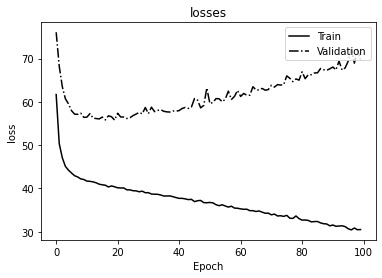

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],'k')
plt.plot(history.history['val_loss'],'k-.')
plt.title('losses')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.savefig('C:\\Users\\adity\\Desktop\\MTP\\TF_dom\\curr'+'.png')
plt.show()

In [47]:
predict=pd.DataFrame(model.predict(scaled_newdata))
predict1=pd.DataFrame(model1.predict(scaled_newdata))
pred=pd.concat([predict, predict1], axis=1)
exact=pd.DataFrame(pred)

from sklearn.metrics import mean_squared_error
m1 = np.sqrt(mean_squared_error(Y.iloc[:,0],exact.iloc[:,0]))
m2 = np.sqrt(mean_squared_error(Y.iloc[:,1],exact.iloc[:,1]))
print((m1+m2)/2)

64.6934460984154
